Este notebook é uma tradução da Cappra Institute for Data Science baseada no modelo criado pelo [Alison Hill](https://github.com/alsnhll/SEIR_COVID19)

Open Original at: <a href="https://colab.research.google.com/github/alsnhll/SEIR_COVID19/blob/master/SEIR_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo

### Equações

\begin{equation}
\begin{split}
\dot{S} &= -\beta_1 I_1 S -\beta_2 I_2 S - \beta_3 I_3 S\\
\dot{E} &=\beta_1 I_1 S +\beta_2 I_2 S + \beta_3 I_3 S - a E \\
\dot{I_1} &= a E - \gamma_1 I_1 - p_1 I_1 \\
\dot{I_2} &= p_1 I_1 -\gamma_2 I_2 - p_2 I_2 \\
\dot{I_3} & = p_2 I_2 -\gamma_3 I_3 - \mu I_3 \\
\dot{R} & = \gamma_1 I_1 + \gamma_2 I_2 + \gamma_3 I_3 \\
\dot{D} & = \mu I_3
\end{split}
\end{equation}

### Variáveis
* $S$: Indivíduos Suscetíveis
* $E$: Indivíduos Expostos - infectados, mas ainda não infecciosos ou sintomáticos
* $I_i$: Indivíduos infectados na classe de gravidade $i$. A gravidade aumenta com $i$ e assumimos que os indivíduos devem passar por todas as classes anteriores
  * $I_1$: Infecção leve (hospitalização não é necessária) - Mild Infection
  * $I_2$: Infecção grave (hospitalização necessária) - Severe infection
  * $I_3$: Infecção critica (cuidados na UTI necessária) - Critical infection
* $R$: Indivíduos que se recuperaram da doença e agora estão imunes
* $D$: Indivíduos mortos
* $N=S+E+I_1+I_2+I_3+R+D$ Tamanho total da população (constante)

### Parâmetros
* $\beta_i$ taxa na qual indivíduos infectados da classe $I_i$ entram em contato com suscetíveis e os infectam
* $a$ taxa de progressão da classe exposta para a infectada
* $\gamma_i$ taxa na qual indivíduos infectados da classe $I_i$ se recuperam da doença e se tornam imunes
* $p_i$ taxa na qual indivíduos infectados da classe $I_i$ avançam para a classe $I_{I + 1}$
* $\mu$ taxa de mortalidade de indivíduos na fase mais grave da doença

### Taxa Básica de reprodução

Ideia: $R_0$ é a soma de: 
1.  o número médio de infecções secundárias geradas de um indivíduo em estágio $I_1$
2.  a probabilidade de um indivíduo infectado progredir para $I_2$ multiplicado pelo número médio de infecções secundárias geradas a partir de um indivíduo em estágio $I_2$
3.  a probabilidade de um indivíduo infectado progredir para $I_3$ multiplicado pelo número médio de infecções secundárias geradas a partir de um indivíduo em estágio$I_3$

\begin{equation}
\begin{split}
R_0 & = N\frac{\beta_1}{p_1+\gamma_1} + \frac{p_1}{p_1 + \gamma_1} \left( \frac{N \beta_2}{p_2+\gamma_2} + \frac{p_2}{p_2 + \gamma_2} \frac{N \beta_3}{\mu+\gamma_3}\right)\\
&= N\frac{\beta_1}{p_1+\gamma_1} \left(1 + \frac{p_1}{p_2 + \gamma_2}\frac{\beta_2}{\beta_1} \left( 1 + \frac{p_2}{\mu + \gamma_3} \frac{\beta_3}{\beta_2} \right) \right)
\end{split}
\end{equation}

<!--## Model

### Equations

\begin{equation}
\begin{split}
\dot{S} &= -\beta_1 I_1 S -\beta_2 I_2 S - \beta_3 I_3 S\\
\dot{E} &=\beta_1 I_1 S +\beta_2 I_2 S + \beta_3 I_3 S - a E \\
\dot{I_1} &= a E - \gamma_1 I_1 - p_1 I_1 \\
\dot{I_2} &= p_1 I_1 -\gamma_2 I_2 - p_2 I_2 \\
\dot{I_3} & = p_2 I_2 -\gamma_3 I_3 - \mu I_3 \\
\dot{R} & = \gamma_1 I_1 + \gamma_2 I_2 + \gamma_3 I_3 \\
\dot{D} & = \mu I_3
\end{split}
\end{equation}

### Variables
* $S$: Susceptible individuals
* $E$: Exposed individuals - infected but not yet infectious or symptomatic
* $I_i$: Infected individuals in severity class $i$. Severity increaes with $i$ and we assume individuals must pass through all previous classes
  * $I_1$: Mild infection (hospitalization not required)
  * $I_2$: Severe infection (hospitalization required)
  * $I_3$: Critical infection (ICU required)
* $R$: individuals who have recovered from disease and are now immune
* $D$: Dead individuals
* $N=S+E+I_1+I_2+I_3+R+D$ Total population size (constant)

### Parameters
* $\beta_i$ rate at which infected individuals in class $I_i$ contact susceptibles and infect them
* $a$ rate of progression from the exposed to infected class
* $\gamma_i$ rate at which infected individuals in class $I_i$ recover from disease and become immune
* $p_i$ rate at which infected individuals in class $I_i$ progress to class $I_{I+1}$
* $\mu$ death rate for individuals in the most severe stage of disease

### Basic reproductive ratio

Idea: $R_0$ is the sum of 
1. the average number of secondary infections generated from an individual in stage $I_1$
2. the probability that an infected individual progresses to $I_2$ multiplied by the average number of secondary infections generated from an individual in stage $I_2$
3.  the probability that an infected individual progresses to $I_3$ multiplied by the average number of secondary infections generated from an individual in stage $I_3$

\begin{equation}
\begin{split}
R_0 & = N\frac{\beta_1}{p_1+\gamma_1} + \frac{p_1}{p_1 + \gamma_1} \left( \frac{N \beta_2}{p_2+\gamma_2} + \frac{p_2}{p_2 + \gamma_2} \frac{N \beta_3}{\mu+\gamma_3}\right)\\
&= N\frac{\beta_1}{p_1+\gamma_1} \left(1 + \frac{p_1}{p_2 + \gamma_2}\frac{\beta_2}{\beta_1} \left( 1 + \frac{p_2}{\mu + \gamma_3} \frac{\beta_3}{\beta_2} \right) \right)
\end{split}
\end{equation}-->

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Definindo as equações diferenciais

Não rastreie S porque todas as variáveis devem somar 1
inclua a primeira entrada em branco no vetor para beta, gama, p, para que os índices se alinhem nas equações e no código. 
No futuro, poderá incluir recuperação ou infecção da classe exposta (assintomáticos)

<!--#Defining the differential equations

#Don't track S because all variables must add up to 1 
#include blank first entry in vector for beta, gamma, p so that indices align in equations and code. 
#In the future could include recovery or infection from the exposed class (asymptomatics)-->

In [2]:
def seir(y,t,b,a,g,p,u,N): 
    dy=[0,0,0,0,0,0]
    S=N-sum(y);
    dy[0]=np.dot(b[1:3],y[1:3])*S-a*y[0] # E
    dy[1]= a*y[0]-(g[1]+p[1])*y[1] #I1
    dy[2]= p[1]*y[1] -(g[2]+p[2])*y[2] #I2
    dy[3]= p[2]*y[2] -(g[3]+u)*y[3] #I3
    dy[4]= np.dot(g[1:3],y[1:3]) #R
    dy[5]=u*y[3] #D

    return dy

#### Definir parâmetros com base em observações clínicas

Vamos adicionar as fontes em breve
https://github.com/midas-network/COVID-19/tree/master/parameter_estimates/2019_novel_coronavirus

<!--# Define parameters based on clinical observations

#I will add sources soon
# https://github.com/midas-network/COVID-19/tree/master/parameter_estimates/2019_novel_coronavirus-->

In [3]:
IncubPeriod=5  #Período de incubação em dias
DurMildInf=10 #Duração de infecções leves em dias
FracMild=0.8  #Fração de infecções leves
FracSevere=0.15 #Fração de infecções graves
FracCritical=0.05 #Fração de infecções críticas
CFR=0.02 #Taxa de mortalidade de casos (fração de infecções resultando em morte)
TimeICUDeath=7 #Tempo de internação na UTI até a morte em dias
DurHosp=11 #Duração da internação em dias


In [4]:
# Definir parâmetros e executar ODE

N=1000
b=np.zeros(4) #beta
g=np.zeros(4) #gamma
p=np.zeros(3)

a=1/IncubPeriod

u=(1/TimeICUDeath)*(CFR/FracCritical)
g[3]=(1/TimeICUDeath)-u

p[2]=(1/DurHosp)*(FracCritical/(FracCritical+FracSevere))
g[2]=(1/DurHosp)-p[2]

g[1]=(1/DurMildInf)*FracMild
p[1]=(1/DurMildInf)-g[1]

#b=2e-4*np.ones(4) # todas as etapas transmitem igualmente
b=2.5e-4*np.array([0,1,0,0]) # casos hospitalizados não transmitem

#Calcula a taxa reprodutiva básica
R0=N*((b[1]/(p[1]+g[1]))+(p[1]/(p[1]+g[1]))*(b[2]/(p[2]+g[2])+ (p[2]/(p[2]+g[2]))*(b[3]/(u+g[3]))))
print("R0 = {0:4.1f}".format(R0))

R0 =  2.5


In [5]:
print(b)
print(a)
print(g)
print(p)
print(u)

[0.      0.00025 0.      0.     ]
0.2
[0.         0.08       0.06818182 0.08571429]
[0.         0.02       0.02272727]
0.057142857142857134


(1, 1000)

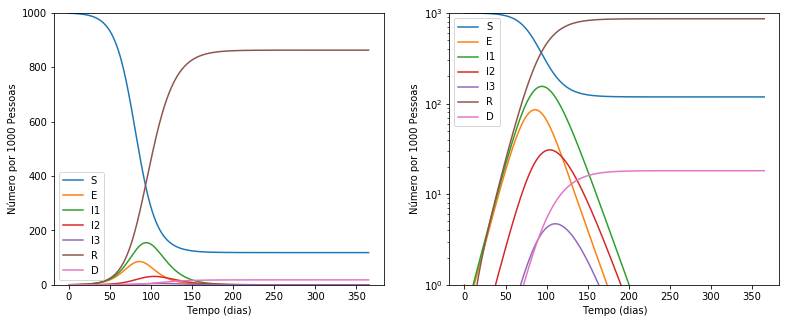

In [6]:
tmax=365
tvec=np.arange(0,tmax,0.1)
ic=np.zeros(6)
ic[0]=1

soln=odeint(seir,ic,tvec,args=(b,a,g,p,u,N))
soln=np.hstack((N-np.sum(soln,axis=1,keepdims=True),soln))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(tvec,soln)
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("S","E","I1","I2","I3","R","D"))
plt.ylim([0,1000])

#Mesmo gráfico, mas em escala de log
plt.subplot(1,2,2)
plt.plot(tvec,soln)
plt.semilogy()
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("S","E","I1","I2","I3","R","D"))
plt.ylim([1,1000])
#plt.tight_layout()

observe a taxa de crescimento r (e o tempo de duplicação) de uma variável específica entre os pontos de tempo selecionados
(todas as classes infectadas crescem no mesmo ritmo durante a infecção precoce)

Não possui uma fórmula analítica simples para r para este modelo devido à complexidade dos estágios

<!--# get observed growth rate r (and doubling time) for a particular variable between selected time points
#(all infected classes eventually grow at same rate during early infection)

#Don't have a simple analytic formula for r for this model due to the complexity of the stages-->

In [7]:
def growth_rate(tvec,soln,t1,t2,i):
  i1=np.where(tvec==t1)[0][0]
  i2=np.where(tvec==t2)[0][0]
  r=(np.log(soln[i2,1])-np.log(soln[i1,1]))/(t2-t1)
  DoublingTime=np.log(2)/r

  return r, DoublingTime

In [8]:
(r,DoublingTime)=growth_rate(tvec,soln,10,20,1)
print("A taxa de crescimento epidêmico é = {0:4.2f} por dia e o tempo de duplicação é de {1:4.1f} dias ".format(r,DoublingTime))

A taxa de crescimento epidêmico é = 0.08 por dia e o tempo de duplicação é de  9.0 dias 


### Repetindo, mas com medidas de distanciamento social que reduz a taxa de transmissão

<!--### Repeat but with a social distancing measure that reduces transmission rate-->

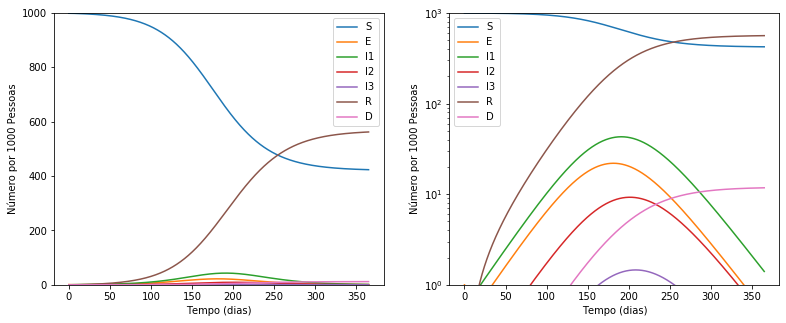

R0 sob intervenção =  1.5
A taxa de crescimento epidêmico é = 0.03 por dia e o tempo de duplicação é de 23.3 dias 


In [9]:
bSlow=0.6*b
R0Slow=N*((bSlow[1]/(p[1]+g[1]))+(p[1]/(p[1]+g[1]))*(bSlow[2]/(p[2]+g[2])+ (p[2]/(p[2]+g[2]))*(bSlow[3]/(u+g[3]))))

solnSlow=odeint(seir,ic,tvec,args=(bSlow,a,g,p,u,N))
solnSlow=np.hstack((N-np.sum(solnSlow,axis=1,keepdims=True),solnSlow))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(tvec,solnSlow)
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("S","E","I1","I2","I3","R","D"))
plt.ylim([0,1000])

# Mesmo gráfico, mas em escala de log
plt.subplot(1,2,2)
plt.plot(tvec,solnSlow)
plt.semilogy()
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("S","E","I1","I2","I3","R","D"))
plt.ylim([1,1000])

(rSlow,DoublingTimeSlow)=growth_rate(tvec,solnSlow,30,40,1)

plt.show()
print("R0 sob intervenção = {0:4.1f}".format(R0Slow))
print("A taxa de crescimento epidêmico é = {0:4.2f} por dia e o tempo de duplicação é de {1:4.1f} dias ".format(rSlow,DoublingTimeSlow))

#### Comparação do crescimento da epidemia com e sem intervenção de medidas de distanciamento social

Todos os casos infecciosos (não expostos)

<!--#### Compare epidemic growth with and without intervention

All infectious cases (not exposed)-->


Text(0.5, 1.0, 'Todos os casos infecciosos')

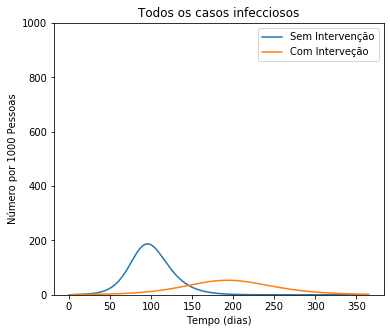

In [10]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(tvec,np.sum(soln[:,2:5],axis=1,keepdims=True))
plt.plot(tvec,np.sum(solnSlow[:,2:5],axis=1,keepdims=True))
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("Sem Intervenção","Com Interveção"))
plt.ylim([0,1000])
plt.title('Todos os casos infecciosos')

## COVID19 Casos vs Capacidade Hospitalar

<!--## COVID19 Cases vs Hospital Capacity-->

Dependendo do estágio de gravidade ($I_i$) da infecção por COVID-19, os pacientes precisam de diferentes níveis de atendimento médico.

Indivíduos em $I_1$ têm infecção "leve", o que significa que têm tosse / febre / outros sintomas de gripe e também podem ter pneumonia leve. Pneumonia leve não requer hospitalização, embora em muitos locais de surtos como China e Coréia do Sul todos os pacientes sintomáticos estejam sendo hospitalizados. É provável que isso reduza a propagação e monitore esses pacientes caso eles progridam rapidamente para um resultado pior. No entanto, é um enorme fardo para o sistema de saúde.

Indivíduos em $I_2$ têm infecção "grave", classificada clinicamente como tendo uma das seguintes características: "dispnéia, frequência respiratória 30/min, saturação de oxigênio no sangue 93%, pressão parcial de oxigênio arterial em fração da razão de oxigênio inspirada $<$300, o pulmão infiltra $>$50% dentro de 24 a 48 horas ". Esses indivíduos necessitam de hospitalização, mas podem ser tratados em enfermarias regulares. Eles podem exigir oxigênio suplementar.

Os indivíduos em $I_3$ têm infecção "crítica", classificada como tendo qualquer um dos seguintes: "insuficiência respiratória, choque séptico e/ou disfunção ou falha de múltiplos órgãos".
Eles exigem cuidados no nível da UTI, geralmente porque precisam de ventilação mecânica.

Consideramos diferentes cenários para os requisitos de atendimento. Uma variação entre os cenários é se incluiremos hospitalização para todos os indivíduos ou apenas aqueles com infecção grave ou crítica. Outro é o atendimento de pacientes críticos. Se as UTIs estão cheias, os hospitais têm protocolos desenvolvidos para a gripe pandêmica para fornecer ventilação mecânica fora das instalações regulares da UTI e dos requisitos de pessoal. Comparado aos protocolos de ventilação "convencionais", existem protocolos de "contingência" e "crise" que podem ser adotados para aumentar a carga do paciente. Esses protocolos envolvem o aumento da proporção paciente: equipe, o uso de leitos que não são de UTI e o envolvimento de especialistas em cuidados não críticos no atendimento ao paciente.

<!--Depending on the severity ($I_i$) stage of COVID-19 infection, patients need different level of medical care. 

Individuals in $I_1$ have "mild" infection, meaning they have cough/fever/other flu-like symptoms and may also have mild pneumonia. Mild pneumonia does not require hospitalization, although in many outbreak locations like China and South Korea all symptomatic patients are being hospitalized. This is likely to reduce spread and to monitor these patients in case they rapidly progress to worse outcome. However, it is a huge burden on the health care system.

Individuals in $I_2$ have "severe" infection, which is categorized medically as having any of the following: "dyspnea, respiratory frequency 30/min, blood oxygen saturation 93%, partial pressure of arterial oxygen to fraction of inspired oxygen ratio $<$300, lung infiltrates $>$50% within 24 to 48 hours". These individuals require hospitalization but can be treated on regular wards. They may require supplemental oxygen. 

Individuals in $I_3$ have "critical" infection, which is categorized as having any of the following: "respiratory failure, septic shock, and/or multiple organ dysfunction or failure".
They require ICU-level care, generally because they need mechanical ventilation. 

We consider different scenarios for care requirements. One variation between scenarios is whether we include hospitalization for all individuals or only those with severe or critical infection. Another is the care of critical patients. If ICUs are full, hospitals have protocols developed for pandemic influenza to provide mechanical ventilation outside regular ICU facility and staffing requirements. Compared to "conventional" ventilation protocols, there are "contingency" and "crisis" protocols that can be adopted to increase patient loads. These protocols involve increasing patient:staff ratios, using non-ICU beds, and involving non-critical care specialists in patient care. -->



Fonte dos parâmetros: http://fbh.com.br/wp-content/uploads/2019/05/CenarioDosHospitaisNoBrasil2019_10maio2019_web.pdf
<br> http://tabnet.datasus.gov.br/cgi/deftohtm.exe?cnes/cnv/leiintbr.def
<br> https://pebmed.com.br/brasil-tem-2-leitos-de-uti-para-cada-10-mil-habitantes/
<br> http://www.ans.gov.br/images/stories/prestadores/E-EFI-01.pdf

Todos os valores são ajustados para maior ocupação devido à temporada de gripe

<!--Parameter sources: https://docs.google.com/spreadsheets/d/1zZKKnZ47lqfmUGYDQuWNnzKnh-IDMy15LBaRmrBcjqE

All values are adjusted for increased occupancy due to flu season-->

In [11]:
# AvailHospBeds=2.6*(1-0.66*1.1) #Leitos hospitalares disponíveis por 1000 pessoas nos EUA, com base no total de leitos e ocupação
# AvailICUBeds=0.26*(1-0.68*1.07) #leitos de UTI disponíveis para cada 1000 pessoas nos EUA, com base no total de leitos e ocupação. Apenas conta leitos adultas, não neonatais/pediátricas
# ConvVentCap=0.062 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos convencionais
# ContVentCap=0.15 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos de contingência
# CrisisVentCap=0.42 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos de crise

#taxa de ocupação leitos hospitalares no Brasil entre 75% e 85%

AvailHospBeds=1.95*(1-0.66*1.1) #Leitos hospitalares disponíveis por 1000 pessoas nos BRASIL, com base no total de leitos e ocupação
AvailICUBeds=0.137*(1-0.68*1.07) #leitos de UTI disponíveis para cada 1000 pessoas nos BRASIL, com base no total de leitos e ocupação. Apenas conta leitos adultas, não neonatais/pediátricas
ConvVentCap=0.062 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos convencionais
ContVentCap=0.15 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos de contingência
CrisisVentCap=0.42 #Excesso estimado de número de pacientes que poderiam ser ventilados nos EUA (por 1000 pessoas) usando protocolos de crise


### Pressuposto 1
* Apenas casos graves ou críticos vão para o hospital
* Todos os casos críticos requerem cuidados na UTI e ventilação mecânica

<!--### Assumptions 1
* Only severe or critical cases go to the hospital
* All critical cases require ICU care and mechanical ventilation-->



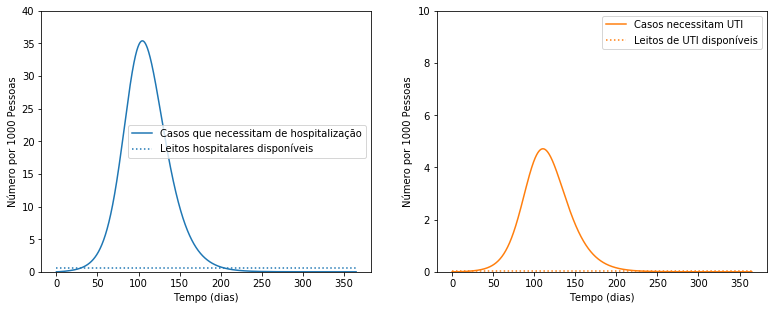

Os leitos hospitalares e de UTI são preenchidos por pacientes COVID19 após 28.6 e 25.7 dias respectivamente


In [12]:
NumHosp=soln[:,3]+soln[:,4]
NumICU=soln[:,4]

plt.figure(figsize=(13,4.8))
plt.subplot(1,2,1)
plt.plot(tvec,NumHosp)
plt.plot(np.array((0, tmax)),AvailHospBeds*np.ones(2),color='C0',linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("Casos que necessitam de hospitalização","Leitos hospitalares disponíveis"))
ipeakHosp=np.argmax(NumHosp) #encontra o pico da epídemia
peakHosp=10*np.ceil(NumHosp[ipeakHosp]/10)#encontra o tempo de duração do pico
plt.ylim([0,peakHosp])

plt.subplot(1,2,2)
plt.plot(tvec,NumICU,color='C1')
plt.plot(np.array((0, tmax)),AvailICUBeds*np.ones(2),color='C1',linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Número por 1000 Pessoas")
plt.legend(("Casos necessitam UTI","Leitos de UTI disponíveis"))
ipeakICU=np.argmax(NumICU) #encontra o pico da epídemia
peakICU=10*np.ceil(NumICU[ipeakICU]/10)#encontra o tempo de duração do pico
plt.ylim([0,peakICU])
plt.ylim([0,10])

#Encontre tempo quando casos hospitalizados = capacidade
icross=np.argmin(np.abs(NumHosp[0:ipeakHosp]-AvailHospBeds)) #encontra a interseção antes do pico
TimeFillBeds=tvec[icross]

#Encontre tempo quando casos de UTI = capacidade
icross=np.argmin(np.abs(NumICU[0:ipeakICU]-AvailICUBeds)) #encontra a interseção antes do pico
TimeFillICU=tvec[icross]

plt.show()
print("Os leitos hospitalares e de UTI são preenchidos por pacientes COVID19 após {0:4.1f} e {1:4.1f} dias respectivamente".format(TimeFillBeds,TimeFillICU))

Observe que não levamos em conta a capacidade limitada no próprio modelo. Se os hospitais estiverem com a capacidade máxima, a taxa de mortalidade aumentará, já que indivíduos com infecção grave e crítica geralmente morrem sem assistência médica. A taxa de transmissão provavelmente também aumentará, pois qualquer assistência domiciliar informal a esses pacientes provavelmente não incluirá o nível de isolamento/precauções usadas em um hospital.

<!--Note that we have not taken into account the limited capacity in the model itself. If hospitals are at capacity, then the death rate will increase, since individuals with severe and critical infection will often die without medical care. The transmission rate will probably also increase, since any informal home-care for these patients will likely not include the level of isolation/precautions used in a hospital.-->

#### Permitir ventilação mecânica fora das UTIs usando capacidade de contingência ou crise

<!--#### Allow for mechanical ventilation outside of ICUs using contingency or crisis capacity-->

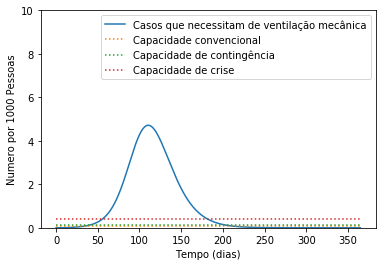

A capacidade de ventilação mecânica é preenchida por pacientes COVID19 após 31.6 (convencional), 42.7 (contingência) e 56.2 (crise) dias respectivamente


In [13]:
plt.plot(tvec,NumICU)
plt.plot(np.array((0, tmax)),ConvVentCap*np.ones(2),linestyle=":")
plt.plot(np.array((0, tmax)),ContVentCap*np.ones(2),linestyle=":")
plt.plot(np.array((0, tmax)),CrisisVentCap*np.ones(2),linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Numero por 1000 Pessoas")
plt.legend(("Casos que necessitam de ventilação mecânica","Capacidade convencional","Capacidade de contingência","Capacidade de crise"))
plt.ylim([0,peakICU])
plt.ylim([0,10])

#Encontra tempo em que casos de UTI = capacidade convencional
icrossConv=np.argmin(np.abs(NumICU[0:ipeakICU]-ConvVentCap)) #encontra a interseção antes do pico
TimeConvCap=tvec[icrossConv]
icrossCont=np.argmin(np.abs(NumICU[0:ipeakICU]-ContVentCap)) #encontra a interseção antes do pico
TimeContCap=tvec[icrossCont]
icrossCrisis=np.argmin(np.abs(NumICU[0:ipeakICU]-CrisisVentCap)) #encontra a interseção antes do pico
TimeCrisisCap=tvec[icrossCrisis]

plt.show()
print("A capacidade de ventilação mecânica é preenchida por pacientes COVID19 após {0:4.1f} (convencional), {1:4.1f} (contingência) e {2:4.1f} (crise) dias respectivamente".format(TimeConvCap,TimeContCap,TimeCrisisCap))

#### Compação com o caso se tivermos intervenção de medidas de distanciamento social

<!--Compare to the case with intervention-->

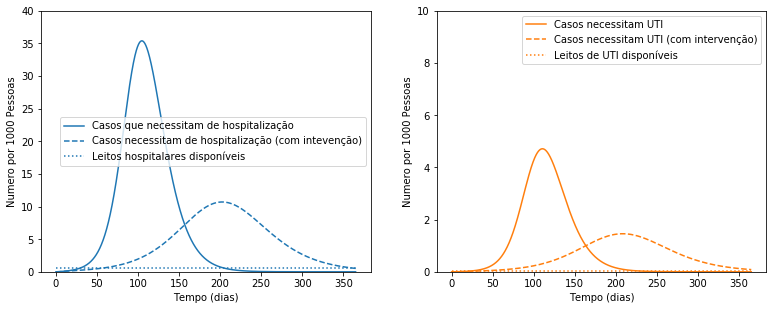

Com a intervenção, leitos hospitalares e de UTI são preenchidos por pacientes com COVID19 após 54.7 e 38.9 dias respectivamente


In [14]:
NumHospSlow=solnSlow[:,3]+solnSlow[:,4]
NumICUSlow=solnSlow[:,4]

plt.figure(figsize=(13,4.8))
plt.subplot(1,2,1)
plt.plot(tvec,NumHosp)
plt.plot(tvec,NumHospSlow,color='C0',linestyle="--")
plt.plot(np.array((0, tmax)),AvailHospBeds*np.ones(2),color='C0',linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Numero por 1000 Pessoas")
plt.legend(("Casos que necessitam de hospitalização","Casos necessitam de hospitalização (com intevenção)","Leitos hospitalares disponíveis"))
plt.ylim([0,peakHosp])

plt.subplot(1,2,2)
plt.plot(tvec,NumICU,color='C1')
plt.plot(tvec,NumICUSlow,color='C1',linestyle="--")
plt.plot(np.array((0, tmax)),AvailICUBeds*np.ones(2),color='C1',linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Numero por 1000 Pessoas")
plt.legend(("Casos necessitam UTI","Casos necessitam UTI (com intervenção)","Leitos de UTI disponíveis"))
plt.ylim([0,peakICU])

#Encontra tempo quando casos hospitalizados = capacidade
ipeakHospSlow=np.argmax(NumHospSlow) #encontra o pico
icross=np.argmin(np.abs(NumHospSlow[0:ipeakHospSlow]-AvailHospBeds)) #encontra a interseção antes do pico
TimeFillBedsSlow=tvec[icross]

#Encontra tempo quando casos de UTI = capacidade
ipeakICUSlow=np.argmax(NumICUSlow) #encontra o pico
icross=np.argmin(np.abs(NumICUSlow[0:ipeakICU]-AvailICUBeds)) #encontra a interseção antes do pico
TimeFillICUSlow=tvec[icross]

plt.show()
print("Com a intervenção, leitos hospitalares e de UTI são preenchidos por pacientes com COVID19 após {0:4.1f} e {1:4.1f} dias respectivamente".format(TimeFillBedsSlow,TimeFillICUSlow))

#### E para maior capacidade de ventilação mecânica
<!--And for expanded mechanical ventilation capacity-->

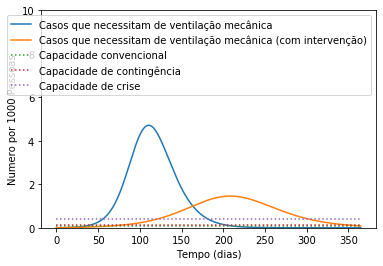

A capacidade de ventilação mecânica é preenchida por pacientes COVID19 após 54.8 (convencional), 84.8 (contingência) e 122.6 (crise) dias respectivamente


In [15]:
plt.plot(tvec,NumICU)
plt.plot(tvec,NumICUSlow)
plt.plot(np.array((0, tmax)),ConvVentCap*np.ones(2),linestyle=":")
plt.plot(np.array((0, tmax)),ContVentCap*np.ones(2),linestyle=":")
plt.plot(np.array((0, tmax)),CrisisVentCap*np.ones(2),linestyle=":")
plt.xlabel("Tempo (dias)")
plt.ylabel("Numero por 1000 Pessoas")
plt.legend(("Casos que necessitam de ventilação mecânica","Casos que necessitam de ventilação mecânica (com intervenção)","Capacidade convencional","Capacidade de contingência","Capacidade de crise"))
plt.ylim([0,peakICU])

#Encontra o tempo em que casos de UTI = capacidade convencional (com intervenção)
icrossConvSlow=np.argmin(np.abs(NumICUSlow[0:ipeakICUSlow]-ConvVentCap)) #encontra a interseção antes do pico
TimeConvCapSlow=tvec[icrossConvSlow]
icrossContSlow=np.argmin(np.abs(NumICUSlow[0:ipeakICUSlow]-ContVentCap)) #encontra a interseção antes do pico
TimeContCapSlow=tvec[icrossContSlow]
icrossCrisisSlow=np.argmin(np.abs(NumICUSlow[0:ipeakICUSlow]-CrisisVentCap)) #encontra a interseção antes do pico
TimeCrisisCapSlow=tvec[icrossCrisisSlow]

plt.show()
print("A capacidade de ventilação mecânica é preenchida por pacientes COVID19 após {0:4.1f} (convencional), {1:4.1f} (contingência) e {2:4.1f} (crise) dias respectivamente".format(TimeConvCapSlow,TimeContCapSlow,TimeCrisisCapSlow))

Interpretação: Enquanto as intervenções que reduzem a infecciosidade "achatam a curva", os casos ainda estão MUITO acima da capacidade hospitalar. Não há como chegar perto da capacidade do leito hospitalar ou da ventilação mecânica sem reduzir $R_0<1$.

<!--Interpretation: While interventions that reduce infectiousness do "flatten the curve", cases are still WAY over hospital capacity. There is no way to get anywhere close to staying under hospital bed capacity or mechanical ventilation capacity without reducing $R_0<1$. -->

### Pressuposto 2
* Todos os casos vão para o hospital
* Todos os casos críticos requerem cuidados na UTI e ventilação mecânica

Nota: Não adianta executar esse cenário, porque seria ainda mais extremo que o pressuposto 1 (casos leves ficaram em casa) e o pressuposto 1 já leva ao rápido esgotamento dos recursos hospitalares

<!--### Assumptions 2
* All cases go to the hospital
* All critical cases require ICU care and mechanical ventilation

Note: No point running this scenario because it would be even more extreme than Assumption 1 (mild cases stayed home) and Assumption 1 already lead to rapid overlow of hospital resources-->

### Pressuposto 3
* Apenas casos graves ou críticos vão para o hospital
* Todos os casos críticos requerem cuidados na UTI e ventilação mecânica
* Quando a capacidade hospitalar é excedida, o indivíduo morre

Nota: Pode ser usado para simular aumentos esperados na morte se a capacidade exceder

<!--### Assumptions 3
* Only severe or critical cases go to the hospital
* All critical cases require ICU care and mechanical ventilation
* When hospital capacity is exceed, individual dies

Note: Could be used to simulate expected increases in death if capacity exceeded -->


## Modelos alternativos

Para continuar...
* Supondo que ~ 30% dos casos sejam assintomáticos (como visto em Diamond Princess) (Isso levaria a uma reinterpretação das taxas relatadas de infecção grave e crítica, de modo que a prevalência desses estágios diminuiria)
* Um modelo paralelo, em vez de em série, do curso da doença (porque não é claro se é realista que indivíduos que passam pelo estágio brando no caminho para um estado grave passem tanto tempo no estágio brando quanto indivíduos que nunca progridem)
* Incluindo transmissão pré-sintomática (nos últimos ~ 2 dias do período exposto, conforme estimado em alguns estudos)

<!--## Alternative Models

To be continued, including
* Assuming ~30% of cases are asymptomatic (as seen on Diamond Princess) (This would lead to a re-interpretation of the reported rates of severe and critical infection, so the prevalence of these stages would decrease)
* A parallel instead of series model of disease course (because it is unclear if it is realistic that individuals who pass through the mild stage on the way to a severe state spend as long in the mild stage as individuals who never progress)
* Including pre-symptomatic transmission (for about last ~2 days of exposed period, as estimated in some studies)-->